# Build PCA

In [1]:
#use PCA for space efficiency
#computing efficiency
#lesser the data, quicker the processing
#visualization for analyzing data
#dimension->features




In [17]:
import numpy as np
np.random.seed(1) #for debugging
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
#step 1 -create dataset
mu_vec1 = np.array([0,0,0]) #sample mean
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance

#we use mean and covariance to generate data

class1_sample = np.random.multivariate_normal(mu_vec1 , cov_mat1, 20).T
print(class1_sample)
#3 x 20 matrix

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733]
 [-0.52817175 -2.3015387   0.3190391  -2.06014071  1.13376944 -0.87785842
  -1.10061918  0.50249434 -0.12289023  0.53035547 -0.6871727  -0.0126646
   1.65980218 -0.88762896  0.05080775  2.10025514  0.30017032 -0.34934272
   0.83898341  0.88514116]]


In [19]:
mu_vec2 = np.array([1,1,1]) #sample mean
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance

#we use mean and covariance to generate data

class2_sample = np.random.multivariate_normal(mu_vec2 , cov_mat2, 20).T
print(class2_sample)

[[ 0.24560206  0.70190716  2.13162939 -0.39649634  1.16003707 -1.02220122
   1.23009474  0.79924193  1.19829972  1.37756379  2.19891788  0.36126959
   0.65614632  1.69803203  1.40349164  1.16938243  0.73378149  1.31515939
   1.35054598 -0.61577235]
 [ 2.25286816  1.48851815  2.51981682 -0.44411381  1.87616892  0.69379599
   1.76201118  1.18656139  1.11900865  1.12182127  1.18515642  1.42349435
   1.04359686  0.55287144  1.59357852  1.74055645  1.03261455  1.84616065
  -0.31228341  2.12141771]
 [ 1.51292982  0.92442829  3.18557541  0.49553414  1.31563495  1.82797464
   0.77767186  1.41005165  0.32933771  2.12948391  0.62471505  1.07734007
   0.37999916  2.2245077  -0.09491185  0.0462994  -0.37311732  0.14048406
   0.96130449  1.40890054]]


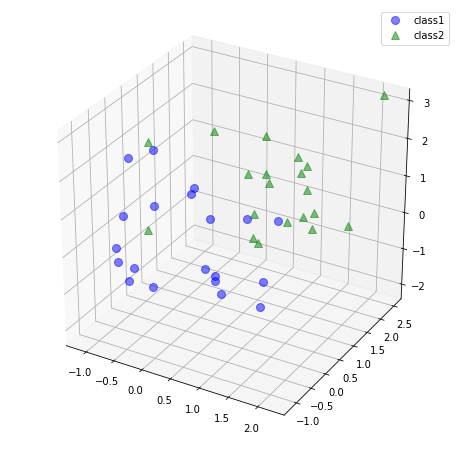

In [20]:
#plotting


#figure, width and height
fig = plt.figure(figsize=(8,8))
#3d subplot
#These are subplot grid parameters encoded as a single integer, so 1x1 grid 1st subplot
ax = fig.add_subplot(111, projection='3d')
#fontsize
plt.rcParams['legend.fontsize'] = 10

#plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()

In [21]:
#merge dataset
all_samples=np.concatenate((class1_sample,class2_sample),axis=1)
all_samples

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208,
         0.24560206,  0.70190716,  2.13162939, -0.39649634,  1.16003707,
        -1.02220122,  1.23009474,  0.79924193,  1.19829972,  1.37756379,
         2.19891788,  0.36126959,  0.65614632,  1.69803203,  1.40349164,
         1.16938243,  0.73378149,  1.31515939,  1.35054598, -0.61577235],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733,
         2.25286816,  1.48851815,  2.51981682, -0.44411381,  1.87616892,
         0.69379599,  1.76201118,  1.18656139,  1.

In [22]:
#compute dimensional mean vector, it will help comopute covariance vector

#calculate mean for each feature
meanX=np.mean(all_samples[0,:])
meanY=np.mean(all_samples[1,:])
meanZ=np.mean(all_samples[2,:])

#3d mean vector
meanVector=np.array([[meanX],[meanY],[meanZ]])
print(meanVector)    
print(meanVector.shape)
              

[[0.41667492]
 [0.69848315]
 [0.49242335]]
(3, 1)


In [23]:
#compute covariance matrix
#covariance - degree by which 2 variables change wrt to each other
cov_matrix=np.zeros((3,3))

cov_matrix=np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance matrix:\n', cov_matrix)    

Covariance matrix:
 [[0.9868668  0.26943262 0.2855759 ]
 [0.26943262 0.92914135 0.30682016]
 [0.2855759  0.30682016 1.27528118]]


In [24]:
#why covariance?- to compute eigen vectors and eigen values
#used in many engineering problems
#what is transformation
#eigen values gives factors by which compression happens
eig_val,eig_vec=np.linalg.eig(cov_matrix)
print('Eigen value\n',eig_val)
print('\n')
print('Eigen vectors\n',eig_vec)

Eigen value
 [1.67100943 0.83832597 0.68195393]


Eigen vectors
 [[-0.49210223 -0.64670286  0.58276136]
 [-0.47927902 -0.35756937 -0.8015209 ]
 [-0.72672348  0.67373552  0.13399043]]


In [25]:
#create eigen pair and sort them
eig_pairs=[(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pairs.sort()
eig_pairs.reverse()

for i in eig_pairs:
    print(i[0])

1.6710094305328695
0.8383259734158451
0.6819539303101816


In [26]:
#choose k eigen vectors
#stacking arrays horizontally
matrix=np.hstack(( eig_pairs[0][1].reshape(3,1),
                  eig_pairs[1][1].reshape(3,1),
      
    ))
matrix

array([[-0.49210223, -0.64670286],
       [-0.47927902, -0.35756937],
       [-0.72672348,  0.67373552]])

In [27]:
#transform data using eigen pair matrix
transform=matrix.T.dot(all_samples)
transform.shape

(2, 40)

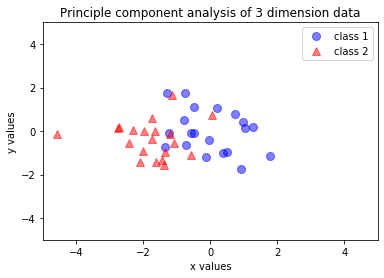

In [28]:
plt.plot(transform[0,0:20],transform[1,0:20], 'o', markersize=8
        ,color='blue',alpha=0.5,label='class 1')
plt.plot(transform[0,20:40],transform[1,20:40], '^', markersize=8
        ,color='red',alpha=0.5,label='class 2')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.title('Principle component analysis of 3 dimension data')
plt.show()